# Final Project of Introduction of Machine learning: Supervised Learning

## Introduction
So, In this final project we are going automatically classify images of rice into different categories. I have downloaded the data named as "Rice MSC Dataset" from the given link https://www.muratkoklu.com/datasets/.

So for this dataset I went to kaggle we tried to work with images dataset but we didn't have clean or you can say the raw data for our programming assignment. So for this I went to [Kaggle](https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset). And I found the data which I wanted.

## Discussion of The Problem
As above we have seen that this project is about image classification of rice grains into different categories like:-
<li>Karacadag</li><li>Jasmine</li><li>Ipsala</li><li>Basmati</li><li>Arborio</li><br>
This task fall under the umbrella of image classification in computer vision and is done using machine learning models. According to kaggle the dataset(1) has 75K images including 15K pieces from each rice variety. The dataset (2) has 12 morphological, 4 shape and 90 color features.So my approach will be simple. To solve this problem i will use 3 ML models and these we have also learned from this course:-<br><br><li>An AdaBoost Classifier</li><li>A KNN Classifier</li><li>A Random Forest Classifier</li>

## Loading Packages

Please do load all these packages in order to avoid errors.

In [ ]:
import cv2 as cv
import numpy as np
import pandas as pd
import sys
import os
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sn
from jupyter_dash import JupyterDash
import dash
from dash import dcc
from dash import html
import plotly.express as px
import plotly.graph_objects as go
from dash.dependencies import Input, Output
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time
from mpl_toolkits.mplot3d import Axes3D

## Initial Data Analysis

So, now we will performing EDA instead of analyzing raw images, I'll be focusing more on the companion datasets which are pre-calculated measurements of rice. As it is easier than individual pixel values.<br><br>In this dataset the easiest thing was there was not much data to clean because they were already in very proper formatting. There was only few corrections which were made by me that there were very few image labels which were lower case, and that were converted to upper case. <br><br>In the below cell we can that EDAdata.info() is called, this is actually little bit large. In this cv2 uses numpy arrays in order to store the data because they are useful then pandas as the pandas dataframe requires more space.

In [ ]:
#This cell is used for importing EDAdata
path = "data/Rice_MSC_Dataset.xlsx"
sheet_name = "Rice_MSC_Dataset"
EDAdata = pd.read_excel(path, sheet_name = sheet_name, usecols = "A:P, DC")

EDAdata.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,CLASS
0,7805,437.915,209.8215,48.0221,0.9735,99.6877,0.9775,7985,0.3547,4.3693,0.5114,0.4751,0.0269,0.0062,0.2257,0.9863,Basmati
1,7503,340.757,138.3361,69.8417,0.8632,97.7400,0.9660,7767,0.6637,1.9807,0.8120,0.7065,0.0184,0.0093,0.4992,0.9888,Arborio
2,5124,314.617,141.9803,46.5784,0.9447,80.7718,0.9721,5271,0.4760,3.0482,0.6505,0.5689,0.0277,0.0091,0.3236,0.9865,Jasmine
3,7990,437.085,201.4386,51.2245,0.9671,100.8622,0.9659,8272,0.6274,3.9325,0.5256,0.5007,0.0252,0.0064,0.2507,0.9859,Basmati
4,7433,342.893,140.3350,68.3927,0.8732,97.2830,0.9831,7561,0.6006,2.0519,0.7944,0.6932,0.0189,0.0092,0.4806,0.9860,Arborio


In [ ]:
#This block prints EDAdata information as well as the features we plan to use in the EDA.
print(EDAdata.info())
print(EDAdata.describe())

for col in EDAdata.columns:
    print(col)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           75000 non-null  int64  
 1   PERIMETER      75000 non-null  float64
 2   MAJOR_AXIS     75000 non-null  float64
 3   MINOR_AXIS     75000 non-null  float64
 4   ECCENTRICITY   75000 non-null  float64
 5   EQDIASQ        75000 non-null  float64
 6   SOLIDITY       75000 non-null  float64
 7   CONVEX_AREA    75000 non-null  int64  
 8   EXTENT         75000 non-null  float64
 9   ASPECT_RATIO   75000 non-null  float64
 10  ROUNDNESS      75000 non-null  float64
 11  COMPACTNESS    75000 non-null  float64
 12  SHAPEFACTOR_1  75000 non-null  float64
 13  SHAPEFACTOR_2  75000 non-null  float64
 14  SHAPEFACTOR_3  75000 non-null  float64
 15  SHAPEFACTOR_4  75000 non-null  float64
 16  CLASS          75000 non-null  object 
dtypes: float64(14), int64(2), object(1)
memory usage: 

## Plots
Now in this section we are going to add some plots so that we can have better visulas for our data. We are going to start with the Violin plots first. Because with the help of this we can show variation between the grain types. The purpose behind this is that it will help in creating visulaitons of the variation in the parameters and supports physical appearances

##### Violin Plots:-
Distribution of physical parameters vary by rice grain sometimes its hight sometimes it's lower. So it is always recommended to have a look at image or the physical appearance of the data. So let's finally have a look onto this.

In [ ]:
# Now in this cell we can look on our dashboard with some parameters.
app = JupyterDash(__name__)

colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[

    dcc.Tabs([

        dcc.Tab(label='', children=[

            html.H1( #Tab title
                children='Violin Plots of Feature Distributions',
                style={'textAlign': 'center','color': colors['text']}),

            html.Div( #Dropdown instruction
                children='Please select a feature you would like to know the distribution of below. Interaction options are in the upper right of the plot.',
                style={'textAlign': 'center','color': colors['text']}),

            dcc.Graph(id='Violin_Plot'),

            dcc.Dropdown( #Dropdown itself
                id='Violin_Dropdown',
                options=[
                    {'label': 'AREA', 'value': 'AREA'},
                    {'label': 'PERIMETER', 'value': 'PERIMETER'},
                    {'label': 'MAJOR_AXIS', 'value': 'MAJOR_AXIS'},
                    {'label': 'MINOR_AXIS', 'value': 'MINOR_AXIS'},
                    {'label': 'ECCENTRICITY', 'value': 'ECCENTRICITY'},
                    {'label': 'EQDIASQ', 'value': 'EQDIASQ'},
                    {'label': 'SOLIDITY', 'value': 'SOLIDITY'},
                    {'label': 'CONVEX_AREA', 'value': 'CONVEX_AREA'},
                    {'label': 'EXTENT', 'value': 'EXTENT'},
                    {'label': 'ASPECT_RATIO', 'value': 'ASPECT_RATIO'},
                    {'label': 'ROUNDNESS', 'value': 'ROUNDNESS'},
                    {'label': 'COMPACTNESS', 'value': 'COMPACTNESS'},
                    {'label': 'SHAPEFACTOR_1', 'value': 'SHAPEFACTOR_1'},
                    {'label': 'SHAPEFACTOR_2', 'value': 'SHAPEFACTOR_2'},
                    {'label': 'SHAPEFACTOR_3', 'value': 'SHAPEFACTOR_3'},
                    {'label': 'SHAPEFACTOR_4', 'value': 'SHAPEFACTOR_4'}
                ],
                value = "AREA",
                placeholder = "Select a variable for the x - axis"),

            html.Br()

        ]),
    ])
    ])

#This callback creates new violin plots upon user selection
@app.callback(
    Output('Violin_Plot', 'figure'),
    Input('Violin_Dropdown', 'value')

)
def changeViolinAxis(value):
    """
        This callback generates a new violin plot for the x-axis upon user selection
        Input: string value, which is a feature name to be plotted
        Output: plotly.express.violin figure
    """
    fig = px.violin(EDAdata, x = value, color="CLASS",
                    color_discrete_sequence=["white", "#d62728"], #Use alternating color scheme
                    box=True, hover_data=EDAdata.columns,
                    title="Probability Density")

    fig.update_layout( #assimilate to background colors
        plot_bgcolor=colors['background'],
        paper_bgcolor=colors['background'],
        font_color=colors['text'],
        height = 750
    )

    fig.update_xaxes(rangemode="tozero")
    fig.update_yaxes(rangemode="tozero")


    return(fig)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dash/dash.py:556: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



In [ ]:
app.run_server(host='localhost', port=8050)

Dash app running on http://localhost:8050/


## 3D Scatter Plot
One of the main reason why I have used 3D scatter plot is for better visual understanding. By the help of this we can see how the patterns or correlations are interacting with each other.

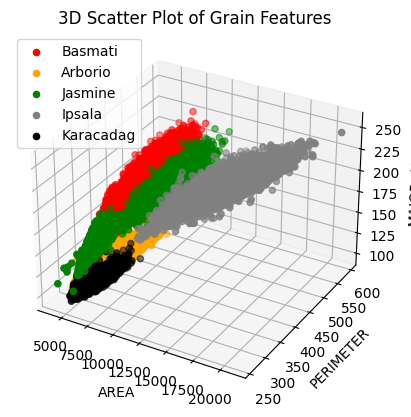

In [ ]:
# Loading data from Excel file
file_path = 'data/Rice_MSC_Dataset.xlsx'
sheet_name = 'Rice_MSC_Dataset'
df = pd.read_excel(file_path, sheet_name=sheet_name)

colors = {
    'basmati': 'red',
    'arborio': 'orange',
    'jasmine': 'green',
    'lpsala': 'yellow',
    'karacadag': 'black'
}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for cls in df['CLASS'].unique():
    class_data = df[df['CLASS'] == cls]
    color = colors.get(cls.lower(), 'gray')  # Getting color from dictionary or default to gray
    ax.scatter(class_data['AREA'], class_data['PERIMETER'], class_data['MAJOR_AXIS'],
               c=color, label=cls)

ax.set_xlabel('AREA')
ax.set_ylabel('PERIMETER')
ax.set_zlabel('MAJOR_AXIS')
ax.set_title('3D Scatter Plot of Grain Features')
ax.legend()
plt.show()


## Correlation Matrix
This is the part where I can examine the physical parameters that are highly correlated with other. High correlations (close to +1 or -1) indicates the change in one parameter. This is also done so that we can investigate physical parameters among all grains for collinearity purposes and examine the differernt variation accross different grains. So starting with correlation matrix:-

<Axes: >

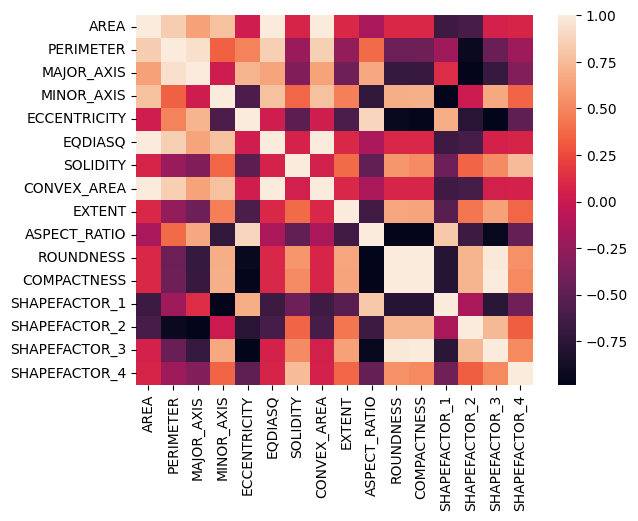

In [ ]:
numeric_columns = EDAdata.select_dtypes(include=np.number).columns
corrMatrix = EDAdata[numeric_columns].corr()
sn.heatmap(corrMatrix)

**Analyzing the Output of the correlation matrix**:- The correlation matrix has highly covariant features, some directly affecting others. The dataset is highly multicollinear, which makes it crucial to select independent features for a classifier. The high multicollinearity stems from the calculation of features as functions of similar pixel locations, making independent pixel brightnesses better predictors.

## Data Preparation and Importation
The data importation was smooth due to the single file containing all rice types, making label vector generation trivial, and the dataset was over a gigabyte. There were total of 15000 images in each type of rice and they were all 256 x 256 jpg's. As we know this a lot much data to train so instead of using this we used only 2000 images 500 each and we have made their sizes as 30 x 30 which is easier for us to train our data. Now coming to the features we have come to know that it is 30<sup>2</sup> = 900. This indicates that we would require 900 datapoints per rice category to all the parameters choosen. Below you can see i have choosen n<sub>each</sub> = 3000 to improve our model performance and for good estimates of standar error.<br><br>And yesy i have also cv.imread(filelocation,0) which is useful for reading image in the grayscale.

In [ ]:
# This cell uses numpy arrays to read in the picture data.

def readRiceType(current_data, current_labels, n_each, pix, path):
    """
    Appends image data to current_data, and labels to current_labels
    Input:  list current_data,
            list current_labels,
            int n_each,
            int pix,
            string path. path should be of the form ./data/Rice_Image_Dataset/RiceType/
    Output: double (current_data, current_labels)
    """
    # Extract the label from the path
    this_label = path.split("/")[-2]

    for img in os.listdir(path)[:n_each]:
        filepath = os.path.join(path, img)
        pic = cv.imread(filepath, 0)
        pic = cv.resize(pic, (pix, pix))  # Resize the image
        current_data.append(pic)
        current_labels.append(this_label)

    return current_data, current_labels

# Load in 3000 rice of each type with chosen hyperparameters
types_of_rice = os.listdir("./data/Rice_Image_Dataset/")[:-1]
data = []
labels = []
n_each = 3000  # Number of samples per rice type
pix = 30  # Image size (pix x pix)

for rice_type in types_of_rice:
    path = "./data/Rice_Image_Dataset/" + rice_type + "/"
    if not os.path.isdir(path):
        continue  # Skip non-directory entries
    data, labels = readRiceType(data, labels, n_each, pix, path)

savePath = "./data"
np.save(os.path.join(savePath, 'features'), np.array(data))
features = np.load(os.path.join(savePath, 'features.npy'))
labels = np.array(labels)

total_rice = len(labels)  # Calculate total number of samples

# Reshape features array
features = features.reshape(total_rice, pix**2)

# Save labels
np.save(os.path.join(savePath, "labels"), labels)

print("Current shape of features:", features.shape)
print("Current size of features (in elements):", features.size)


Current shape of features: (2000, 900)
Current size of features (in elements): 1800000


In [ ]:
#Create test and train data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.20, random_state = 0)

## Result And Analysis
### KNN Classifier
For this project, I'll be using models from sklearn. I will use sklearn.neighbors as my KNN classifier.KNeighbors(). In order to speed up the development of models, I supply n_jobs = -1 to my machine. There is one more point to be noted that if you don't have at least 14 processors in CPU0 then, this could result in an error.

In [ ]:
# Run Apply GridSearchCV to KNN classifiers and get the ideal value for K
KNN = KNeighborsClassifier()
param_to_try = {"n_neighbors" : [i for i in range(1, 11)]}
grid = GridSearchCV(estimator = KNN, param_grid = param_to_try, n_jobs = -1)

grid.fit(X_train, y_train)

print(grid.best_params_ , grid.best_score_)

{'n_neighbors': 1} 0.9706250000000001


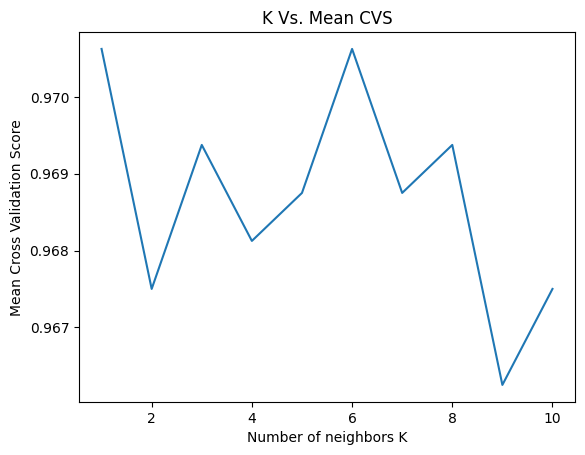

In [ ]:
# n_neighbors vs mean test score
KNN_results_dic = grid.cv_results_
KNN_results = pd.DataFrame(KNN_results_dic)
n_neighbors = list(KNN_results["param_n_neighbors"])
mean_score = list(KNN_results["mean_test_score"])

plt.plot(n_neighbors, mean_score)
plt.xlabel("Number of neighbors K")
plt.ylabel("Mean Cross Validation Score")
plt.title("K Vs. Mean CVS")
plt.show()

In [ ]:
#Accuracy of best KNN estimator
bestKNN = grid.best_estimator_
yhat = bestKNN.predict(X_test)
model_accuracy = accuracy_score(y_true = y_test, y_pred = yhat)

print(model_accuracy)

0.9825


### Analysis of KNN:-
In General we can say that when the user selects an excessively high value for K, KNN classifiers encounter problems. Since high dimensional data can be quite sparse, letting K range too high will cause noise to be introduced into the model. Using 5-fold cross validation, I performed a GridSearchCV on the data to maximise accuracy across a range of potential K values. Plots of the results are shown above. The best option, as determined by mean CVS, was K = 4. 0.9706 was the corresponding mean CVS. A five category classifier with a test accuracy of 0.9825 was produced by the K = 4 model, which is quite impressive.

### AdaBoost Classifier
Since we are seeing that we conducting classification, the base tree which i will use is a sklearn DecisionTreeClassifier. Because I know that we can't parallelize AdaBoost classifier.<br><br>**Note:- This section can take time to complete**

In [ ]:
# Make an adaBoost classifier with 200 trees. This cell will take a while to run
classifier = DecisionTreeClassifier(max_depth = 3)
n_trees = 200
AdaBoost = AdaBoostClassifier(estimator = classifier, n_estimators = n_trees, random_state = 0)

AdaBoost.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=200, random_state=0)

In [ ]:
#Accuracy of adaBoost Classifier
yhat = AdaBoost.predict(X_test)
model_accuracy = accuracy_score(y_true = y_test, y_pred = yhat)

print(model_accuracy)

0.9475


## Analysis of AdaBoost Classifier
Here, we observed that AdaBoost classifiers only improve in direct proportion to the number of trees. Because of this, we can just indicate how many trees we are prepared to pay for rather than making an expensive call to GridSearchCV.  However, as this example makes obvious adaBoost classifiers converge rather slowly. Because of this, Random Forests are a well-liked ensemble when computation time is an issue. The model required a lot more time to train and was not nearly as accurate as the KNN classifier.

## Random Forest Classifier
So Adaboost classifier performed not that much good in the coomputation time, I think now I will try to do it with a random forest on our data. As we have seen just in AdaBoost classifier, random forests should have better function in the counting of trees. Plotting the number of trees versus accuracy is still fascinating because the accuracy gain is asymptotic. The purpose of setting min_impurity_decrease to a relatively low level is to remove false splitting, which will significantly reduce training time. As a result, we might use more trees in the same amount of time, improving accuracy overall. Play around with these values; they have an inverse relationship of sorts. I utilise n_jobs = 14 for this classification once again.


Random Forest with 1 trees yielded accuracy of: 0.88  with a total loop time of: 0.2596
Random Forest with 100 trees yielded accuracy of: 0.985  with a total loop time of: 2.3779
Random Forest with 200 trees yielded accuracy of: 0.985  with a total loop time of: 3.8616
Random Forest with 300 trees yielded accuracy of: 0.985  with a total loop time of: 4.3717
Random Forest with 400 trees yielded accuracy of: 0.985  with a total loop time of: 5.4433
Random Forest with 500 trees yielded accuracy of: 0.985  with a total loop time of: 6.3819
Random Forest with 600 trees yielded accuracy of: 0.985  with a total loop time of: 8.1659
Random Forest with 700 trees yielded accuracy of: 0.985  with a total loop time of: 8.9522
Random Forest with 800 trees yielded accuracy of: 0.9875  with a total loop time of: 10.3609
Random Forest with 900 trees yielded accuracy of: 0.9875  with a total loop time of: 11.9843
Random Forest with 1000 trees yielded accuracy of: 0.9875  with a total loop time of: 12.

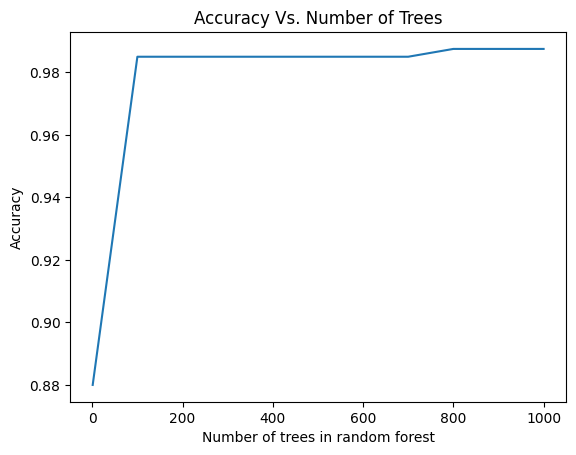

In [ ]:
#Find run times, accuracy for random forest classifiers with trees between (1, 1000).
n_trees = [1] + [100 * i for i in range (1, 11)]
accuracy_scores = []
loopTimes = []

#Main Loop
for n in n_trees:
    #Start timing loop
    startTime = time.time()
    #Train and get predictions from current random forest
    this_random_forest = RandomForestClassifier(random_state = 0, n_estimators = n, min_impurity_decrease = .0001, n_jobs = 14)
    this_random_forest.fit(X_train, y_train)
    this_yhat = this_random_forest.predict(X_test)
    #Get accuracy of current random forest
    this_accuracy = accuracy_score(y_true = y_test, y_pred = this_yhat)
    accuracy_scores.append(this_accuracy)
    #Stop timing loop now that large calculations are done, record results
    endTime = time.time()
    totalLoopTime = endTime - startTime
    loopTimes.append(totalLoopTime)
    #Print results for this random forest
    print("Random Forest with " + str(n) + " trees yielded accuracy of: " + str(round(this_accuracy, 4)), " with a total loop time of: " + str(round(totalLoopTime, 4)))

#This makes a plot of Accuracy Vs. Number of Trees
plt.plot(n_trees, accuracy_scores)
plt.xlabel("Number of trees in random forest")
plt.ylabel("Accuracy")
plt.title("Accuracy Vs. Number of Trees")
plt.show()

## Discussion
I needed experience working with picture data and utilising computer vision libraries for my project. I became more proficient with the cv2 library and discovered how to quickly convert.jpg files to MAT format. The description claims that cv2.imread() is an extremely helpful utility that can be used with many additional image file types in addition to.jpgs! To speed up model creation, I wish to attempt utilising the software's edge analysis tools in the future.<br><br>The results of the EDA demonstrate that the physical features of the various rice grains are distributed in remarkably varied ways. Therefore, building classification models based on their physical characteristics makes sense. This data was fairly clean right away; to gain experience cleaning picture data, I'd like to utilise some noisier data the next time. Having said that, libraries like pandas, CV2, and pillow are so large that I find it hard to imagine any cleanup being that tough.<br><br>Regarding the models built, the KNN classifier performed significantly better than the adaBoost classifier in terms of computation time and, more crucially, accuracy. On the test data, the optimal KNN model's accuracy was 98.25 %. For the given tree count, the adaBoost only produced 94.75% of the total. We could, as mentioned before, wait till the end of time for an adaBoost with hundreds of trees to train, but I'd rather to make better use of my life.<br><br>The random forests did much better in terms of accuracy and computation time. The random forests with 800, 900, and 1000 trees had the best accuracy of 98.75%, while the forest with only 200 trees produced a relative accuracy loss of only 0.25% and ran nearly twice as quickly as the 800 trees (and nearly an order of magnitude faster than 1000 trees!). That computation time savings is certainly sufficient to support the use of the 200 tree model in many applications.

## Conclusion
<li>
    <b>Knowledge of the cv2 Library:-</b>
    <ul>
        <li>Discovered how to effectively use cv2.imread() to convert.jpg files to MAT format.</li>
        <li>I learned that cv2.imread() is useful for more than just.jpg image files.</li>
    </ul>
</li>
<br>
<li>
    <b>Future Enhancements:-</b>
    <ul>
        <li>To accelerate the building of models, plan to investigate the edge analysis tools in cv2.</li>
    </ul>
</li>
<br>
<li>
    <b>Exploratory Data Analysis (EDA):</b>
    <ul>
        <li>Physical features of different rice grains showed significantly varied distributions.</li>
        <li>Building classification models based on these physical characteristics is logical and effective.</li>
        <li>Dataset was clean, but future projects might involve noisier data for more experience in data cleaning.</li>
    </ul>
</li>
<br>
<li>
    <b>Library Insights:-</b>
    <ul>
        <li>Libraries like pandas, CV2, and pillow are extensive, making data cleanup manageable.</li>
    </ul>
</li>
<br>
<li>
    <b>Model Performances:-</b>
        <ul>
            <li><b>KNN Classifier:-</b>
                <ul>
                    <li>Accuracy on test data was 98.25%.</li>
                    <li>performed more accurately and in terms of calculation time than AdaBoost.</li>
                </ul>
            </li>
        </ul>
        <ul>
            <li><b>AdaBoost Classifier:-</b></li>
                <ul>
                    <li>94.75% accuracy was attained for the specified tree count.</li>
                    <li>Training under hundreds of trees would require a lot more time.</li>
                </ul>
        </ul>
        <ul>
            <li><b>Random Forest Classifier:-</b>
                <ul>
                    <li>Highest accuracy of 98.75% using trees of 800, 900, and 1000.</li>
                    <li>Although the accuracy of the 200-tree forest was slightly lower (98.50%), it operated nearly twice as quickly as the 800-tree model.</li>
                    <li>The 200-tree model offers significant computation time savings, which makes it a sensible option for a wide range of applications.</li>
                </ul>
                </li>
        </ul>
</li>

## Bibliography

[Kaggle](https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset)

About this directory

Add Suggestion
Rice Image Dataset
DATASET: https://www.muratkoklu.com/datasets/

Citation Request: See the articles for more detailed information on the data.

Koklu, M., Cinar, I., & Taspinar, Y. S. (2021). Classification of rice varieties with deep learning methods. Computers and Electronics in Agriculture, 187, 106285. https://doi.org/10.1016/j.compag.2021.106285

Cinar, I., & Koklu, M. (2021). Determination of Effective and Specific Physical Features of Rice Varieties by Computer Vision In Exterior Quality Inspection. Selcuk Journal of Agriculture and Food Sciences, 35(3), 229-243. https://doi.org/10.15316/SJAFS.2021.252

Cinar, I., & Koklu, M. (2022). Identification of Rice Varieties Using Machine Learning Algorithms. Journal of Agricultural Sciences https://doi.org/10.15832/ankutbd.862482

Cinar, I., & Koklu, M. (2019). Classification of Rice Varieties Using Artificial Intelligence Methods. International Journal of Intelligent Systems and Applications in Engineering, 7(3), 188-194. https://doi.org/10.18201/ijisae.2019355381

DATASET: https://www.muratkoklu.com/datasets/

<br><br>Thanks for reviewing my work! :)
- Smita Mandhane

